In [1]:
# Importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Viewing the csv file.

spam_data = pd.read_csv('../spam_detection/spam.csv', encoding='latin-1')
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
spam_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
# DRopping the unnnecessary cols.

spam_data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'
], inplace=True)

In [5]:
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
spam_data = spam_data[['v1', 'v2']]
spam_data.columns = ['Label', 'Msg']

In [7]:
spam_data

,Label,Msg
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


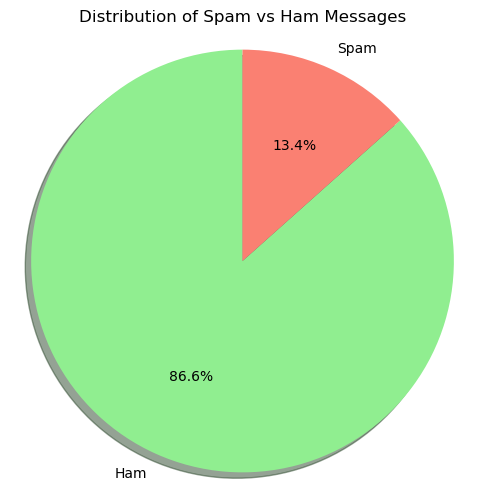

In [8]:
# Visualizing the data

label_counts = spam_data['Label'].value_counts()

# Define labels and colors
labels = ['Ham', 'Spam']
colors = ['lightgreen', 'salmon']

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Spam vs Ham Messages')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

In [9]:
spam_data['Label'] = spam_data['Label'].map({'ham': 0, 'spam': 1})

In [10]:
X = spam_data['Msg']
y = spam_data['Label']

In [11]:
# Importing the required libraries for model training.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)

(4457,) (4457,)


In [13]:
vec = TfidfVectorizer(stop_words = 'english')

In [14]:
X_train_tfidf = vec.fit_transform(X_train)

In [15]:
X_test_tfidf = vec.transform(X_test)

In [16]:
print(X_train_tfidf.shape)

(4457, 7472)


In [17]:
def model(model, name):
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    print(f"\n-----{name}-----")
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", accuracy_score(y_test, y_pred))

In [18]:
model(LogisticRegression(), "Logistic Regression")
model(MultinomialNB(), "Naive Bayes")
model(RandomForestClassifier(), "Random Forest")


-----Logistic Regression-----
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy:  0.9524663677130045

-----Naive Bayes-----
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy:  0.9668161434977578

-----Random Forest-----
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.84      0.91       150

    accuracy                           0.98

In [19]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)


X_train_tfidf shape: (4457, 7472)
y_train shape: (4457,)


In [20]:
print(type(X_train))
print(X_train.shape)
print(X_train[:5])


<class 'pandas.core.series.Series'>
(4457,)
1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: Msg, dtype: object


In [22]:
print(type(X), X.shape)
print(type(y), y.shape)


<class 'pandas.core.series.Series'> (5572,)
<class 'pandas.core.series.Series'> (5572,)
